In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from collections import OrderedDict

### Importando tabelas

In [21]:
df_matriculas = pd.DataFrame()

# importando notas de 2010 a 2017
for i in range(10,18):
    for j in range(1,3):
        print('20'+str(i)+str(j))
        df_matricula = pd.read_csv('data_science/matriculas_new/matricula-componente-20'+str(i)+str(j)+'.csv',sep=';')
        #concatena as tabelas de 2010 a 2017
        df_matriculas = pd.concat([df_matriculas, df_matricula])

# obtendo o id do curso de ciências e tecnologia
df_cursos = pd.read_csv('data_science/cursos-graduacao.csv', sep=';')
id_cet = df_cursos[df_cursos.nome == 'CIÊNCIAS E TECNOLOGIA'].id_curso
id_cet

20101
20102
20111
20112
20121
20122
20131
20132
20141
20142
20151
20152
20161
20162
20171
20172


17    10320810
Name: id_curso, dtype: int64

In [23]:
# filtra tabela pelo id_curso
df_matriculas = df_matriculas[df_matriculas.id_curso == float(id_cet)]
df_matriculas.id_curso.value_counts()

10320810.0    910908
Name: id_curso, dtype: int64

In [61]:
df_turmas = pd.read_csv('data_science/turmas-2010-2017-ok.csv')
#df_turmasFilt = df_turmas[(df_turmas['ano'] >= 2014) & (df_turmas['nivel_ensino'] == 'GRADUAÇÃO')]
df_turmasFilt = df_turmas[df_turmas['nivel_ensino'] == 'GRADUAÇÃO']
df_turmasFilt.ano.value_counts()

/home/andressa/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2014    22531
2015    22467
2017    22309
2016    21946
2013    19799
2012    17161
2011    15786
2010    15092
Name: ano, dtype: int64

In [62]:
df_componentes = pd.read_csv('data_science/componentes-curriculares-presenciais-ok.csv')

In [63]:
# print(df_turmasFilt.columns)
# print(df_componentes.columns)

### Merges

In [64]:
df_turmasNome = pd.merge(df_turmasFilt, df_componentes, left_on='id_componente_curricular', right_on='id_componente')

In [66]:
colunas = ['id_turma', 'codigo', 'nome', 'pre_requisito', 'ano', 'periodo', 'unidade_responsavel']
df_turmasNome = df_turmasNome[colunas]

df_auxAll = pd.merge(df_matriculas, df_turmasNome, on='id_turma')
colunas2 = ['descricao', 'discente', 'id_turma', 'media_final', 'codigo', 'nome', 'ano', 'periodo','unidade_responsavel', 'id_curso']
df_auxAll = df_auxAll[colunas2].drop_duplicates().dropna()

In [76]:
# conjunto de alunos que não serão analisados
series_Antes2014 = df_auxAll[df_auxAll['ano']<2015].discente
# selecionando apenas alunos que entraram a partir de 2014
df_depois2014 = df_auxAll[~df_auxAll['discente'].isin(series_Antes2014)]
df_depois2014 = df_depois2014[df_depois2014['unidade_responsavel'] == 'ESCOLA DE CIÊNCIAS E TECNOLOGIA']

In [77]:
# verificando
series_Antes2014[series_Antes2014.isin(df_depois2014.discente)]

Series([], Name: discente, dtype: object)

In [108]:
colunas3 = ['codigo', 'nome', 'ano', 'periodo']
df_exportacao = df_depois2014[colunas3].drop_duplicates()
df_exportacao.to_csv('df_depois2014.csv')

In [109]:
disciplinas = ['CÁLCULO I','CÁLCULO II','CÁLCULO III','VETORES E GEOMETRIA ANALÍTICA','PRÉ-CÁLCULO','PROBABILIDADE E ESTATÍSTICA',
               'INTRODUÇÃO À FÍSICA CLÁSSICA I','INTRODUÇÃO À FÍSICA CLÁSSICA II','INTRODUÇÃO À FÍSICA CLÁSSICA III','LÓGICA DE PROGRAMAÇÃO',
               'LINGUAGEM DE PROGRAMAÇÃO','COMPUTAÇÃO NUMÉRICA','QUÍMICA GERAL','ÁLGEBRA LINEAR','MECÂNICA DOS SÓLIDOS','MECÂNICA DOS FLUIDOS',
               'CIÊNCIA E TECNOLOGIA DOS MATERIAIS']

In [110]:
df_auxTurmas = df_depois2014[df_depois2014['nome'].isin(disciplinas)]

### Correlação

In [116]:
# apenas os aprovados
df_auxAprovados = df_auxTurmas[df_auxTurmas['descricao'].str.contains('APROVADO')]
df_auxAprovados.columns

Index(['descricao', 'discente', 'id_turma', 'media_final', 'codigo', 'nome',
       'ano', 'periodo', 'unidade_responsavel', 'id_curso'],
      dtype='object')

In [117]:
df_auxAprovados.descricao.value_counts()

APROVADO POR NOTA    11473
APROVADO              6360
Name: descricao, dtype: int64

In [118]:
discentes= df_auxAprovados.discente.unique()

In [119]:
df_auxAprovados.columns

Index(['descricao', 'discente', 'id_turma', 'media_final', 'codigo', 'nome',
       'ano', 'periodo', 'unidade_responsavel', 'id_curso'],
      dtype='object')

In [120]:
df_auxAprovados.descricao.value_counts()

APROVADO POR NOTA    11473
APROVADO              6360
Name: descricao, dtype: int64

In [121]:
df_calc1 = df_auxAprovados[df_auxAprovados['nome']=='CÁLCULO I']
df_calc1 = df_calc1[['discente','media_final']]
print(df_calc1.shape)

df_calc2 = df_auxAprovados[df_auxAprovados['nome']=='CÁLCULO II']
df_calc2 = df_calc2[['discente','media_final']]
print(df_calc2.shape)

df_calc3 = df_auxAprovados[df_auxAprovados['nome']=='CÁLCULO III']
df_calc3 = df_calc3[['discente','media_final']]
print(df_calc3.shape)

df_vga = df_auxAprovados[df_auxAprovados['nome']=='VETORES E GEOMETRIA ANALÍTICA']
df_vga = df_vga[['discente','media_final']]
print(df_vga.shape)

df_pc = df_auxAprovados[df_auxAprovados['nome']=='PRÉ-CÁLCULO']
df_pc = df_pc[['discente','media_final']]
print(df_pc.shape)

df_pe = df_auxAprovados[df_auxAprovados['nome']=='PROBABILIDADE E ESTATÍSTICA']
df_pe = df_pe[['discente','media_final']]
print(df_pe.shape)

df_f1 = df_auxAprovados[df_auxAprovados['nome']=='INTRODUÇÃO À FÍSICA CLÁSSICA I']
df_f1 = df_f1[['discente','media_final']]
print(df_f1.shape)

df_f2 = df_auxAprovados[df_auxAprovados['nome']=='INTRODUÇÃO À FÍSICA CLÁSSICA II']
df_f2 = df_f2[['discente','media_final']]
print(df_f2.shape)

df_f3 = df_auxAprovados[df_auxAprovados['nome']=='INTRODUÇÃO À FÍSICA CLÁSSICA III']
df_f3 = df_f3[['discente','media_final']]
print(df_f3.shape)

df_lop = df_auxAprovados[df_auxAprovados['nome']=='LÓGICA DE PROGRAMAÇÃO']
df_lop = df_lop[['discente','media_final']]
print(df_lop.shape)

df_lp = df_auxAprovados[df_auxAprovados['nome']=='LINGUAGEM DE PROGRAMAÇÃO']
df_lp = df_lp[['discente','media_final']]
print(df_lp.shape)

df_cn = df_auxAprovados[df_auxAprovados['nome']=='COMPUTAÇÃO NUMÉRICA']
df_cn = df_cn[['discente','media_final']]
print(df_cn.shape)

df_qg = df_auxAprovados[df_auxAprovados['nome']=='QUÍMICA GERAL']
df_qg = df_qg[['discente','media_final']]
print(df_qg.shape)

df_al = df_auxAprovados[df_auxAprovados['nome']=='ÁLGEBRA LINEAR']
df_al = df_al[['discente','media_final']]
print(df_al.shape)

df_ms = df_auxAprovados[df_auxAprovados['nome']=='MECÂNICA DOS SÓLIDOS']
df_ms = df_ms[['discente','media_final']]
print(df_ms.shape)

df_mf = df_auxAprovados[df_auxAprovados['nome']=='MECÂNICA DOS FLUIDOS']
df_mf = df_mf[['discente','media_final']]
print(df_mf.shape)

df_ctm = df_auxAprovados[df_auxAprovados['nome']=='CIÊNCIA E TECNOLOGIA DOS MATERIAIS']
df_ctm = df_ctm[['discente','media_final']]
print(df_ctm.shape)

(1499, 2)
(964, 2)
(675, 2)
(1626, 2)
(1920, 2)
(953, 2)
(978, 2)
(927, 2)
(694, 2)
(1286, 2)
(943, 2)
(618, 2)
(1933, 2)
(994, 2)
(548, 2)
(559, 2)
(716, 2)


In [183]:
df_correr = pd.DataFrame()
df_correr['discente'] = discentes

disciplinas = ['CÁLCULO I','CÁLCULO II','CÁLCULO III','QUÍMICA GERAL','ÁLGEBRA LINEAR','PROBABILIDADE E ESTATÍSTICA',
               'LINGUAGEM DE PROGRAMAÇÃO','COMPUTAÇÃO NUMÉRICA','MECÂNICA DOS SÓLIDOS','MECÂNICA DOS FLUIDOS',
               'CIÊNCIA E TECNOLOGIA DOS MATERIAIS','VETORES E GEOMETRIA ANALÍTICA','PRÉ-CÁLCULO',
               'INTRODUÇÃO À FÍSICA CLÁSSICA I','INTRODUÇÃO À FÍSICA CLÁSSICA II','INTRODUÇÃO À FÍSICA CLÁSSICA III','LÓGICA DE PROGRAMAÇÃO']

dataFrames = [df_calc1,df_calc2,df_calc3,df_qg,df_al,df_pe,df_lp,df_cn,df_ms,df_mf,df_ctm,df_vga,df_pc,df_f1,df_f2,df_f3,df_lop]

# dataFrames,disciplinas
for i in range(0, len(dataFrames)):
    df_correr = pd.merge(df_correr, dataFrames[i], on='discente')
    df_correr = df_correr.rename(columns={"media_final": disciplinas[i]})
    print(disciplinas[i])
#     display(df_correr.head())
    
df_correr.head()

CÁLCULO I
CÁLCULO II
CÁLCULO III
QUÍMICA GERAL
ÁLGEBRA LINEAR
PROBABILIDADE E ESTATÍSTICA
LINGUAGEM DE PROGRAMAÇÃO
COMPUTAÇÃO NUMÉRICA
MECÂNICA DOS SÓLIDOS
MECÂNICA DOS FLUIDOS
CIÊNCIA E TECNOLOGIA DOS MATERIAIS
VETORES E GEOMETRIA ANALÍTICA
PRÉ-CÁLCULO
INTRODUÇÃO À FÍSICA CLÁSSICA I
INTRODUÇÃO À FÍSICA CLÁSSICA II
INTRODUÇÃO À FÍSICA CLÁSSICA III
LÓGICA DE PROGRAMAÇÃO


,discente,CÁLCULO I,CÁLCULO II,CÁLCULO III,QUÍMICA GERAL,ÁLGEBRA LINEAR,PROBABILIDADE E ESTATÍSTICA,LINGUAGEM DE PROGRAMAÇÃO,COMPUTAÇÃO NUMÉRICA,MECÂNICA DOS SÓLIDOS,MECÂNICA DOS FLUIDOS,CIÊNCIA E TECNOLOGIA DOS MATERIAIS,VETORES E GEOMETRIA ANALÍTICA,PRÉ-CÁLCULO,INTRODUÇÃO À FÍSICA CLÁSSICA I,INTRODUÇÃO À FÍSICA CLÁSSICA II,INTRODUÇÃO À FÍSICA CLÁSSICA III,LÓGICA DE PROGRAMAÇÃO
0,d00171e04d77a7994414014d941baf8c,10.0,5.7,6.8,6.9,7.6,6.7,5.3,6.4,5.0,7.7,6.9,6.5,7.2,7.1,6.0,7.6,6.3
1,3ff085f94a31cdddd21d355d0d8f6438,10.0,8.0,6.4,8.1,8.4,7.8,6.7,8.1,6.3,9.0,7.1,8.1,8.8,10.0,7.0,10.0,9.5
2,bb7bc1c9d40935fe8d7d76f83d39ee62,10.0,8.7,8.8,6.6,10.0,10.0,9.9,8.7,8.3,10.0,7.8,6.1,7.7,10.0,8.0,10.0,9.1
3,db6560af2b1538425add4e182fe0927e,10.0,7.5,8.4,5.9,9.8,8.6,7.0,7.0,6.7,9.9,5.8,5.3,7.5,10.0,7.2,9.5,8.7
4,e749444b410bab4bf5c2a86bffaee6c7,9.3,8.2,7.0,7.0,10.0,7.5,6.9,7.8,6.0,9.5,7.0,5.3,8.5,10.0,7.6,10.0,8.0


In [239]:
heat= pd.DataFrame(df_correr.corr())
heat['CÁLCULO I']['CÁLCULO III']=0
heat['CÁLCULO I']['QUÍMICA GERAL']=0
heat['CÁLCULO I']['ÁLGEBRA LINEAR']=0
heat['CÁLCULO I']['LINGUAGEM DE PROGRAMAÇÃO']=0
heat['CÁLCULO I']['MECÂNICA DOS SÓLIDOS']=0
heat['CÁLCULO I']['MECÂNICA DOS FLUIDOS']=0
heat['CÁLCULO I']['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']=0
heat['CÁLCULO I']['VETORES E GEOMETRIA ANALÍTICA']=0
heat['CÁLCULO I']['PRÉ-CÁLCULO']=0
heat['CÁLCULO I']['INTRODUÇÃO À FÍSICA CLÁSSICA II']=0
heat['CÁLCULO I']['INTRODUÇÃO À FÍSICA CLÁSSICA III']=0
heat['CÁLCULO I']['LÓGICA DE PROGRAMAÇÃO']=0

heat['CÁLCULO III']['CÁLCULO I']=0
heat['QUÍMICA GERAL']['CÁLCULO I']=0
heat['ÁLGEBRA LINEAR']['CÁLCULO I']=0
heat['LINGUAGEM DE PROGRAMAÇÃO']['CÁLCULO I']=0
heat['MECÂNICA DOS SÓLIDOS']['CÁLCULO I']=0
heat['MECÂNICA DOS FLUIDOS']['CÁLCULO I']=0
heat['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']['CÁLCULO I']=0
heat['VETORES E GEOMETRIA ANALÍTICA']['CÁLCULO I']=0
heat['PRÉ-CÁLCULO']['CÁLCULO I']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA II']['CÁLCULO I']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA III']['CÁLCULO I']=0
heat['LÓGICA DE PROGRAMAÇÃO']['CÁLCULO I']=0

heat['CÁLCULO II']['LINGUAGEM DE PROGRAMAÇÃO']=0
heat['CÁLCULO II']['QUÍMICA GERAL']=0
heat['CÁLCULO II']['COMPUTAÇÃO NUMÉRICA']=0
heat['CÁLCULO II']['ÁLGEBRA LINEAR']=0
heat['CÁLCULO II']['PROBABILIDADE E ESTATÍSTICA']=0
heat['CÁLCULO II']['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']=0
heat['CÁLCULO II']['VETORES E GEOMETRIA ANALÍTICA']=0
heat['CÁLCULO II']['INTRODUÇÃO À FÍSICA CLÁSSICA I']=0
heat['CÁLCULO II']['INTRODUÇÃO À FÍSICA CLÁSSICA II']=0
heat['CÁLCULO II']['INTRODUÇÃO À FÍSICA CLÁSSICA III']=0
heat['CÁLCULO II']['LÓGICA DE PROGRAMAÇÃO']=0

heat['LINGUAGEM DE PROGRAMAÇÃO']['CÁLCULO II']=0
heat['QUÍMICA GERAL']['CÁLCULO II']=0
heat['COMPUTAÇÃO NUMÉRICA']['CÁLCULO II']=0
heat['ÁLGEBRA LINEAR']['CÁLCULO II']=0
heat['PROBABILIDADE E ESTATÍSTICA']['CÁLCULO II']=0
heat['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']['CÁLCULO II']=0
heat['VETORES E GEOMETRIA ANALÍTICA']['CÁLCULO II']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA I']['CÁLCULO II']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA II']['CÁLCULO II']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA III']['CÁLCULO II']=0
heat['LÓGICA DE PROGRAMAÇÃO']['CÁLCULO II']=0


heat['CÁLCULO III']['QUÍMICA GERAL']=0
heat['CÁLCULO III']['ÁLGEBRA LINEAR']=0
heat['CÁLCULO III']['PROBABILIDADE E ESTATÍSTICA']=0
heat['CÁLCULO III']['LINGUAGEM DE PROGRAMAÇÃO']=0
heat['CÁLCULO III']['COMPUTAÇÃO NUMÉRICA']=0
heat['CÁLCULO III']['MECÂNICA DOS SÓLIDOS']=0
heat['CÁLCULO III']['MECÂNICA DOS FLUIDOS']=0
heat['CÁLCULO III']['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']=0
heat['CÁLCULO III']['VETORES E GEOMETRIA ANALÍTICA']=0
heat['CÁLCULO III']['PRÉ-CÁLCULO']=0
heat['CÁLCULO III']['INTRODUÇÃO À FÍSICA CLÁSSICA I']=0
heat['CÁLCULO III']['INTRODUÇÃO À FÍSICA CLÁSSICA II']=0
heat['CÁLCULO III']['LÓGICA DE PROGRAMAÇÃO']=0

heat['QUÍMICA GERAL']['CÁLCULO III']=0
heat['ÁLGEBRA LINEAR']['CÁLCULO III']=0
heat['PROBABILIDADE E ESTATÍSTICA']['CÁLCULO III']=0
heat['LINGUAGEM DE PROGRAMAÇÃO']['CÁLCULO III']=0
heat['COMPUTAÇÃO NUMÉRICA']['CÁLCULO III']=0
heat['MECÂNICA DOS SÓLIDOS']['CÁLCULO III']=0
heat['MECÂNICA DOS FLUIDOS']['CÁLCULO III']=0
heat['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']['CÁLCULO III']=0
heat['VETORES E GEOMETRIA ANALÍTICA']['CÁLCULO III']=0
heat['PRÉ-CÁLCULO']['CÁLCULO III']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA I']['CÁLCULO III']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA II']['CÁLCULO III']=0
heat['LÓGICA DE PROGRAMAÇÃO']['CÁLCULO III']=0

heat['QUÍMICA GERAL']['PROBABILIDADE E ESTATÍSTICA']=0
heat['QUÍMICA GERAL']['LINGUAGEM DE PROGRAMAÇÃO']=0
heat['QUÍMICA GERAL']['COMPUTAÇÃO NUMÉRICA']=0
heat['QUÍMICA GERAL']['MECÂNICA DOS SÓLIDOS']=0
heat['QUÍMICA GERAL']['MECÂNICA DOS FLUIDOS']=0
heat['QUÍMICA GERAL']['VETORES E GEOMETRIA ANALÍTICA']=0
heat['QUÍMICA GERAL']['PRÉ-CÁLCULO']=0
heat['QUÍMICA GERAL']['INTRODUÇÃO À FÍSICA CLÁSSICA I']=0
heat['QUÍMICA GERAL']['INTRODUÇÃO À FÍSICA CLÁSSICA II']=0
heat['QUÍMICA GERAL']['INTRODUÇÃO À FÍSICA CLÁSSICA III']=0
heat['QUÍMICA GERAL']['LÓGICA DE PROGRAMAÇÃO']=0

heat['PROBABILIDADE E ESTATÍSTICA']['QUÍMICA GERAL']=0
heat['LINGUAGEM DE PROGRAMAÇÃO']['QUÍMICA GERAL']=0
heat['COMPUTAÇÃO NUMÉRICA']['QUÍMICA GERAL']=0
heat['MECÂNICA DOS SÓLIDOS']['QUÍMICA GERAL']=0
heat['MECÂNICA DOS FLUIDOS']['QUÍMICA GERAL']=0
heat['VETORES E GEOMETRIA ANALÍTICA']['QUÍMICA GERAL']=0
heat['PRÉ-CÁLCULO']['QUÍMICA GERAL']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA I']['QUÍMICA GERAL']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA II']['QUÍMICA GERAL']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA III']['QUÍMICA GERAL']=0
heat['LÓGICA DE PROGRAMAÇÃO']['QUÍMICA GERAL']=0

heat['PROBABILIDADE E ESTATÍSTICA']['LINGUAGEM DE PROGRAMAÇÃO']=0
heat['PROBABILIDADE E ESTATÍSTICA']['COMPUTAÇÃO NUMÉRICA']=0
heat['PROBABILIDADE E ESTATÍSTICA']['MECÂNICA DOS SÓLIDOS']=0
heat['PROBABILIDADE E ESTATÍSTICA']['MECÂNICA DOS FLUIDOS']=0
heat['PROBABILIDADE E ESTATÍSTICA']['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']=0
heat['PROBABILIDADE E ESTATÍSTICA']['VETORES E GEOMETRIA ANALÍTICA']=0
heat['PROBABILIDADE E ESTATÍSTICA']['PRÉ-CÁLCULO']=0
heat['PROBABILIDADE E ESTATÍSTICA']['INTRODUÇÃO À FÍSICA CLÁSSICA I']=0
heat['PROBABILIDADE E ESTATÍSTICA']['INTRODUÇÃO À FÍSICA CLÁSSICA II']=0
heat['PROBABILIDADE E ESTATÍSTICA']['INTRODUÇÃO À FÍSICA CLÁSSICA III']=0
heat['PROBABILIDADE E ESTATÍSTICA']['LÓGICA DE PROGRAMAÇÃO']=0

heat['LINGUAGEM DE PROGRAMAÇÃO']['PROBABILIDADE E ESTATÍSTICA']=0
heat['COMPUTAÇÃO NUMÉRICA']['PROBABILIDADE E ESTATÍSTICA']=0
heat['MECÂNICA DOS SÓLIDOS']['PROBABILIDADE E ESTATÍSTICA']=0
heat['MECÂNICA DOS FLUIDOS']['PROBABILIDADE E ESTATÍSTICA']=0
heat['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']['PROBABILIDADE E ESTATÍSTICA']=0
heat['VETORES E GEOMETRIA ANALÍTICA']['PROBABILIDADE E ESTATÍSTICA']=0
heat['PRÉ-CÁLCULO']['PROBABILIDADE E ESTATÍSTICA']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA I']['PROBABILIDADE E ESTATÍSTICA']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA II']['PROBABILIDADE E ESTATÍSTICA']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA III']['PROBABILIDADE E ESTATÍSTICA']=0
heat['LÓGICA DE PROGRAMAÇÃO']['PROBABILIDADE E ESTATÍSTICA']=0

heat['LINGUAGEM DE PROGRAMAÇÃO']['MECÂNICA DOS SÓLIDOS']=0
heat['LINGUAGEM DE PROGRAMAÇÃO']['MECÂNICA DOS FLUIDOS']=0
heat['LINGUAGEM DE PROGRAMAÇÃO']['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']=0
heat['LINGUAGEM DE PROGRAMAÇÃO']['VETORES E GEOMETRIA ANALÍTICA']=0
heat['LINGUAGEM DE PROGRAMAÇÃO']['PRÉ-CÁLCULO']=0
heat['LINGUAGEM DE PROGRAMAÇÃO']['INTRODUÇÃO À FÍSICA CLÁSSICA I']=0
heat['LINGUAGEM DE PROGRAMAÇÃO']['INTRODUÇÃO À FÍSICA CLÁSSICA II']=0
heat['LINGUAGEM DE PROGRAMAÇÃO']['INTRODUÇÃO À FÍSICA CLÁSSICA III']=0

heat['MECÂNICA DOS SÓLIDOS']['LINGUAGEM DE PROGRAMAÇÃO']=0
heat['MECÂNICA DOS FLUIDOS']['LINGUAGEM DE PROGRAMAÇÃO']=0
heat['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']['LINGUAGEM DE PROGRAMAÇÃO']=0
heat['VETORES E GEOMETRIA ANALÍTICA']['LINGUAGEM DE PROGRAMAÇÃO']=0
heat['PRÉ-CÁLCULO']['LINGUAGEM DE PROGRAMAÇÃO']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA I']['LINGUAGEM DE PROGRAMAÇÃO']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA II']['LINGUAGEM DE PROGRAMAÇÃO']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA III']['LINGUAGEM DE PROGRAMAÇÃO']=0

heat['COMPUTAÇÃO NUMÉRICA']['MECÂNICA DOS SÓLIDOS']=0
heat['COMPUTAÇÃO NUMÉRICA']['MECÂNICA DOS FLUIDOS']=0
heat['COMPUTAÇÃO NUMÉRICA']['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']=0
heat['COMPUTAÇÃO NUMÉRICA']['VETORES E GEOMETRIA ANALÍTICA']=0
heat['COMPUTAÇÃO NUMÉRICA']['INTRODUÇÃO À FÍSICA CLÁSSICA I']=0
heat['COMPUTAÇÃO NUMÉRICA']['INTRODUÇÃO À FÍSICA CLÁSSICA II']=0
heat['COMPUTAÇÃO NUMÉRICA']['INTRODUÇÃO À FÍSICA CLÁSSICA III']=0
heat['COMPUTAÇÃO NUMÉRICA']['LÓGICA DE PROGRAMAÇÃO']=0
heat['COMPUTAÇÃO NUMÉRICA']['PRÉ-CÁLCULO']=0

heat['MECÂNICA DOS SÓLIDOS']['COMPUTAÇÃO NUMÉRICA']=0
heat['MECÂNICA DOS FLUIDOS']['COMPUTAÇÃO NUMÉRICA']=0
heat['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']['COMPUTAÇÃO NUMÉRICA']=0
heat['VETORES E GEOMETRIA ANALÍTICA']['COMPUTAÇÃO NUMÉRICA']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA I']['COMPUTAÇÃO NUMÉRICA']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA II']['COMPUTAÇÃO NUMÉRICA']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA III']['COMPUTAÇÃO NUMÉRICA']=0
heat['LÓGICA DE PROGRAMAÇÃO']['COMPUTAÇÃO NUMÉRICA']=0
heat['PRÉ-CÁLCULO']['COMPUTAÇÃO NUMÉRICA']=0

heat['MECÂNICA DOS SÓLIDOS']['MECÂNICA DOS FLUIDOS']=0
heat['MECÂNICA DOS SÓLIDOS']['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']=0
heat['MECÂNICA DOS SÓLIDOS']['VETORES E GEOMETRIA ANALÍTICA']=0
heat['MECÂNICA DOS SÓLIDOS']['PRÉ-CÁLCULO']=0
heat['MECÂNICA DOS SÓLIDOS']['INTRODUÇÃO À FÍSICA CLÁSSICA II']=0
heat['MECÂNICA DOS SÓLIDOS']['INTRODUÇÃO À FÍSICA CLÁSSICA III']=0
heat['MECÂNICA DOS SÓLIDOS']['LÓGICA DE PROGRAMAÇÃO']=0

heat['MECÂNICA DOS FLUIDOS']['MECÂNICA DOS SÓLIDOS']=0
heat['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']['MECÂNICA DOS SÓLIDOS']=0
heat['VETORES E GEOMETRIA ANALÍTICA']['MECÂNICA DOS SÓLIDOS']=0
heat['PRÉ-CÁLCULO']['MECÂNICA DOS SÓLIDOS']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA II']['MECÂNICA DOS SÓLIDOS']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA III']['MECÂNICA DOS SÓLIDOS']=0
heat['LÓGICA DE PROGRAMAÇÃO']['MECÂNICA DOS SÓLIDOS']=0

heat['MECÂNICA DOS FLUIDOS']['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']=0
heat['MECÂNICA DOS FLUIDOS']['VETORES E GEOMETRIA ANALÍTICA']=0
heat['MECÂNICA DOS FLUIDOS']['PRÉ-CÁLCULO']=0
heat['MECÂNICA DOS FLUIDOS']['INTRODUÇÃO À FÍSICA CLÁSSICA I']=0
heat['MECÂNICA DOS FLUIDOS']['INTRODUÇÃO À FÍSICA CLÁSSICA III']=0
heat['MECÂNICA DOS FLUIDOS']['LÓGICA DE PROGRAMAÇÃO']=0

heat['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']['MECÂNICA DOS FLUIDOS']=0
heat['VETORES E GEOMETRIA ANALÍTICA']['MECÂNICA DOS FLUIDOS']=0
heat['PRÉ-CÁLCULO']['MECÂNICA DOS FLUIDOS']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA I']['MECÂNICA DOS FLUIDOS']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA III']['MECÂNICA DOS FLUIDOS']=0
heat['LÓGICA DE PROGRAMAÇÃO']['MECÂNICA DOS FLUIDOS']=0

heat['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']['VETORES E GEOMETRIA ANALÍTICA']=0
heat['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']['PRÉ-CÁLCULO']=0
heat['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']['INTRODUÇÃO À FÍSICA CLÁSSICA I']=0
heat['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']['INTRODUÇÃO À FÍSICA CLÁSSICA II']=0
heat['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']['INTRODUÇÃO À FÍSICA CLÁSSICA III']=0
heat['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']['LÓGICA DE PROGRAMAÇÃO']=0

heat['VETORES E GEOMETRIA ANALÍTICA']['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']=0
heat['PRÉ-CÁLCULO']['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA I']['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA II']['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA III']['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']=0
heat['LÓGICA DE PROGRAMAÇÃO']['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']=0

heat['VETORES E GEOMETRIA ANALÍTICA']['PRÉ-CÁLCULO']=0
heat['VETORES E GEOMETRIA ANALÍTICA']['INTRODUÇÃO À FÍSICA CLÁSSICA I']=0
heat['VETORES E GEOMETRIA ANALÍTICA']['INTRODUÇÃO À FÍSICA CLÁSSICA II']=0
heat['VETORES E GEOMETRIA ANALÍTICA']['INTRODUÇÃO À FÍSICA CLÁSSICA III']=0
heat['VETORES E GEOMETRIA ANALÍTICA']['LÓGICA DE PROGRAMAÇÃO']=0

heat['PRÉ-CÁLCULO']['VETORES E GEOMETRIA ANALÍTICA']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA I']['VETORES E GEOMETRIA ANALÍTICA']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA II']['VETORES E GEOMETRIA ANALÍTICA']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA III']['VETORES E GEOMETRIA ANALÍTICA']=0
heat['LÓGICA DE PROGRAMAÇÃO']['VETORES E GEOMETRIA ANALÍTICA']=0

heat['PRÉ-CÁLCULO']['INTRODUÇÃO À FÍSICA CLÁSSICA I']=0
heat['PRÉ-CÁLCULO']['INTRODUÇÃO À FÍSICA CLÁSSICA II']=0
heat['PRÉ-CÁLCULO']['INTRODUÇÃO À FÍSICA CLÁSSICA III']=0
heat['PRÉ-CÁLCULO']['LÓGICA DE PROGRAMAÇÃO']=0

heat['INTRODUÇÃO À FÍSICA CLÁSSICA I']['PRÉ-CÁLCULO']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA II']['PRÉ-CÁLCULO']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA III']['PRÉ-CÁLCULO']=0
heat['LÓGICA DE PROGRAMAÇÃO']['PRÉ-CÁLCULO']=0

heat['INTRODUÇÃO À FÍSICA CLÁSSICA I']['INTRODUÇÃO À FÍSICA CLÁSSICA III']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA I']['LÓGICA DE PROGRAMAÇÃO']=0

heat['INTRODUÇÃO À FÍSICA CLÁSSICA III']['INTRODUÇÃO À FÍSICA CLÁSSICA I']=0
heat['LÓGICA DE PROGRAMAÇÃO']['INTRODUÇÃO À FÍSICA CLÁSSICA I']=0

heat['LÓGICA DE PROGRAMAÇÃO']['INTRODUÇÃO À FÍSICA CLÁSSICA II']=0
heat['LÓGICA DE PROGRAMAÇÃO']['INTRODUÇÃO À FÍSICA CLÁSSICA III']=0

heat['INTRODUÇÃO À FÍSICA CLÁSSICA II']['LÓGICA DE PROGRAMAÇÃO']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA III']['LÓGICA DE PROGRAMAÇÃO']=0

heat['ÁLGEBRA LINEAR']['LINGUAGEM DE PROGRAMAÇÃO']=0
heat['ÁLGEBRA LINEAR']['PROBABILIDADE E ESTATÍSTICA']=0
heat['ÁLGEBRA LINEAR']['LINGUAGEM DE PROGRAMAÇÃO']=0
heat['ÁLGEBRA LINEAR']['MECÂNICA DOS SÓLIDOS']=0
heat['ÁLGEBRA LINEAR']['MECÂNICA DOS FLUIDOS']=0
heat['ÁLGEBRA LINEAR']['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']=0
heat['ÁLGEBRA LINEAR']['PRÉ-CÁLCULO']=0
heat['ÁLGEBRA LINEAR']['INTRODUÇÃO À FÍSICA CLÁSSICA I']=0
heat['ÁLGEBRA LINEAR']['INTRODUÇÃO À FÍSICA CLÁSSICA II']=0
heat['ÁLGEBRA LINEAR']['INTRODUÇÃO À FÍSICA CLÁSSICA III']=0
heat['ÁLGEBRA LINEAR']['LÓGICA DE PROGRAMAÇÃO']=0
heat['ÁLGEBRA LINEAR']['QUÍMICA GERAL']=0

heat['LINGUAGEM DE PROGRAMAÇÃO']['ÁLGEBRA LINEAR']=0
heat['PROBABILIDADE E ESTATÍSTICA']['ÁLGEBRA LINEAR']=0
heat['LINGUAGEM DE PROGRAMAÇÃO']['ÁLGEBRA LINEAR']=0
heat['MECÂNICA DOS SÓLIDOS']['ÁLGEBRA LINEAR']=0
heat['MECÂNICA DOS FLUIDOS']['ÁLGEBRA LINEAR']=0
heat['CIÊNCIA E TECNOLOGIA DOS MATERIAIS']['ÁLGEBRA LINEAR']=0
heat['PRÉ-CÁLCULO']['ÁLGEBRA LINEAR']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA I']['ÁLGEBRA LINEAR']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA II']['ÁLGEBRA LINEAR']=0
heat['INTRODUÇÃO À FÍSICA CLÁSSICA III']['ÁLGEBRA LINEAR']=0
heat['LÓGICA DE PROGRAMAÇÃO']['ÁLGEBRA LINEAR']=0
heat['QUÍMICA GERAL']['ÁLGEBRA LINEAR']=0

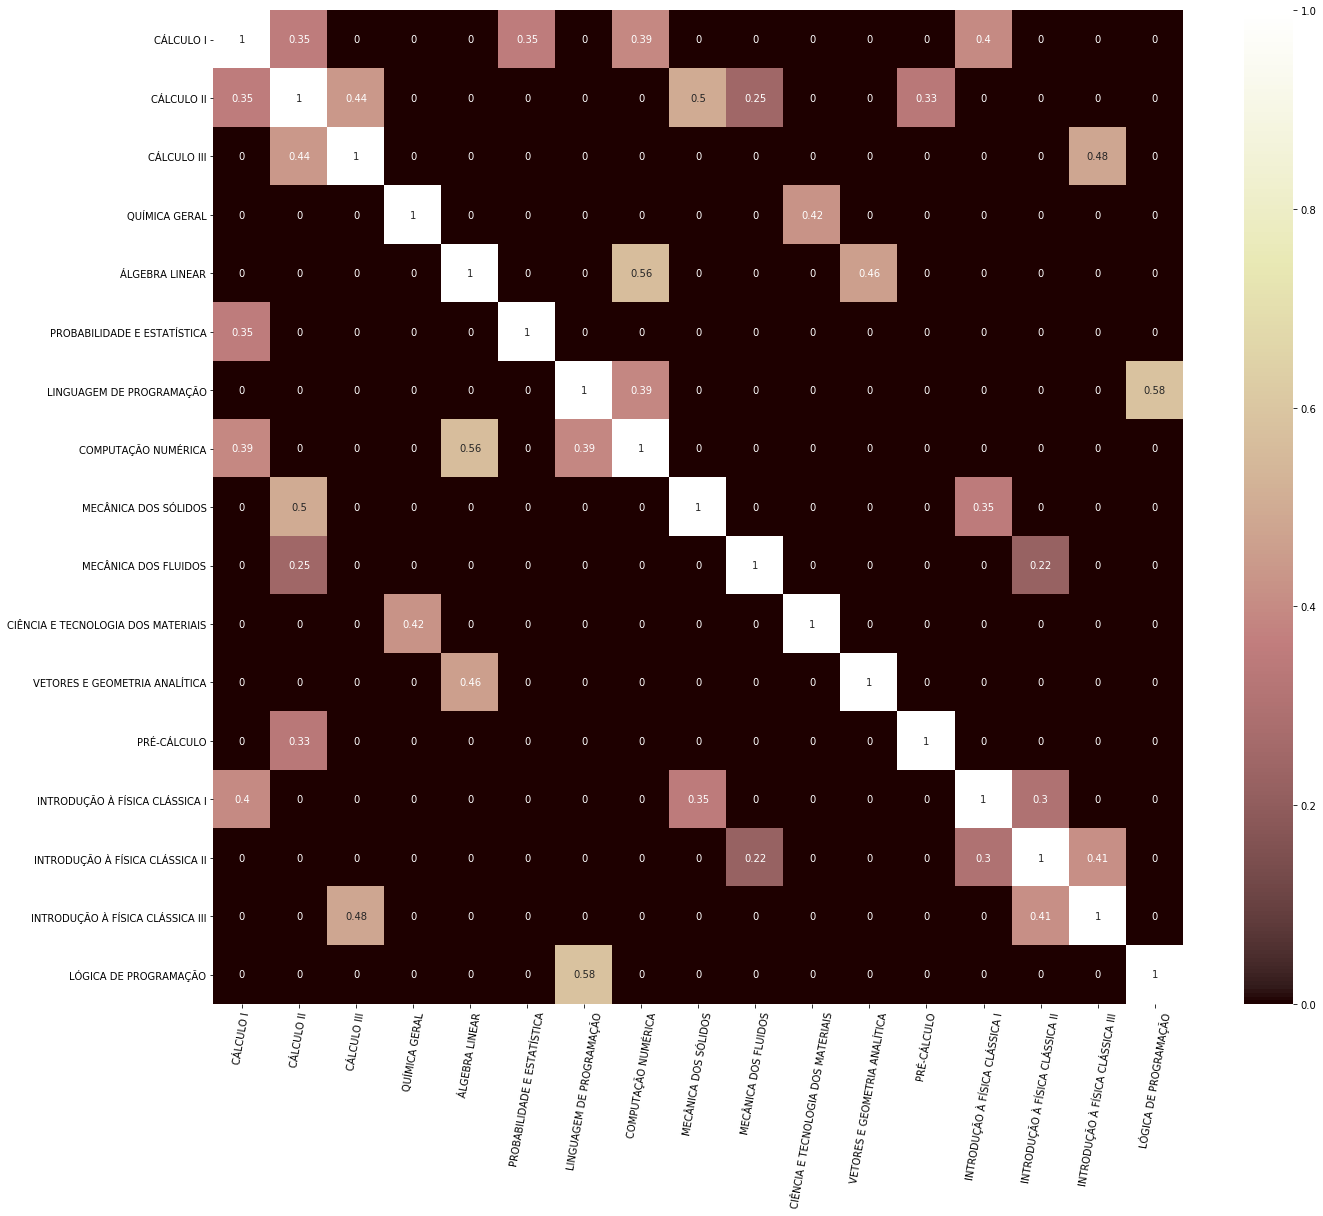

In [240]:
fig, ax = plt.subplots(figsize=(20,17)) 
sns_plot = sns.heatmap(heat, cmap='pink',annot=True, ax=ax)
plt.xticks(rotation=80)
plt.tight_layout()
sns_plot.get_figure().savefig('correlacao.png')